# Exploratory Data Analysis (EDA)
## MIO GPS/Traffic Data Analysis

This notebook provides a comprehensive analysis of the MIO transportation data, including data exploration, statistical analysis, and visualizations to uncover patterns and insights.

## 1. Setup and Data Loading

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("/kaggle/input/mio-dataset/MIO_DATA.csv")
print(f"Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Data loaded successfully!
Dataset shape: (136621, 8)
Memory usage: 29.35 MB


## 2. Initial Data Exploration

In [4]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,LINE,DATE,TIMEOFDAY,RUSHHOUR,ORIENTATION,TRIPDURATION,AVGDELAY,AVGVELOCITY
0,T51,2025-08-11,morning,False,1,56,79,2.50
1,A12B,2025-08-07,morning,True,1,17,-15,1.68
2,A81,2025-08-08,afternoon,True,1,11,-77,2.41
3,A17E,2025-08-04,evening,True,0,20,1083,1.65
4,E27,2025-08-20,evening,True,1,48,-321,2.49
5,A11,2025-08-01,afternoon,False,0,21,-84,1.99
6,A12D,2025-08-11,morning,False,1,18,-109,1.82
7,T52,2025-08-19,afternoon,True,0,58,227,2.13
8,A06,2025-08-19,afternoon,False,0,29,-4,1.68
9,A01A,2025-08-01,afternoon,False,0,12,746,1.02


In [5]:
# Basic information about the dataset
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LINE          136621 non-null  object 
 1   DATE          136621 non-null  object 
 2   TIMEOFDAY     136621 non-null  object 
 3   RUSHHOUR      136621 non-null  bool   
 4   ORIENTATION   136621 non-null  int64  
 5   TRIPDURATION  136621 non-null  int64  
 6   AVGDELAY      136621 non-null  int64  
 7   AVGVELOCITY   136621 non-null  float64
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 7.4+ MB


In [6]:
# Data types and missing values
print("Data Types:")
print("=" * 30)
print(df.dtypes)
print("\nMissing Values:")
print("=" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df)

Data Types:
LINE             object
DATE             object
TIMEOFDAY        object
RUSHHOUR           bool
ORIENTATION       int64
TRIPDURATION      int64
AVGDELAY          int64
AVGVELOCITY     float64
dtype: object

Missing Values:
              Missing Count  Missing Percentage
LINE                      0                 0.0
DATE                      0                 0.0
TIMEOFDAY                 0                 0.0
RUSHHOUR                  0                 0.0
ORIENTATION               0                 0.0
TRIPDURATION              0                 0.0
AVGDELAY                  0                 0.0
AVGVELOCITY               0                 0.0


## 3. Statistical Summary

In [7]:
# Statistical summary of numerical columns
print("Statistical Summary:")
print("=" * 30)
df.describe()

Statistical Summary:


,ORIENTATION,TRIPDURATION,AVGDELAY,AVGVELOCITY
count,136621.000000,136621.000000,136621.000000,136621.000000
mean,0.487114,33.196046,45.671002,2.056488
std,0.499836,18.075127,269.049590,0.541334
min,0.000000,11.000000,-1831.000000,0.210000
25%,0.000000,19.000000,-91.000000,1.700000
50%,0.000000,28.000000,9.000000,2.040000
75%,1.000000,46.000000,129.000000,2.380000
max,1.000000,177.000000,29213.000000,11.670000


In [8]:
# Categorical variables summary
print("Categorical Variables Summary:")
print("=" * 40)

categorical_cols = ['LINE', 'TIMEOFDAY', 'RUSHHOUR', 'ORIENTATION']
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Value counts:")
    print(df[col].value_counts().head(10))
    print("-" * 30)

Categorical Variables Summary:

LINE:
Unique values: 89
Value counts:
LINE
T47     4143
T31     4135
T50     3935
A47     3660
A41A    3611
T40     3476
P21B    3136
A18     2714
P42     2697
P21E    2677
Name: count, dtype: int64
------------------------------

TIMEOFDAY:
Unique values: 3
Value counts:
TIMEOFDAY
afternoon    51982
morning      49900
evening      34739
Name: count, dtype: int64
------------------------------

RUSHHOUR:
Unique values: 2
Value counts:
RUSHHOUR
True     71832
False    64789
Name: count, dtype: int64
------------------------------

ORIENTATION:
Unique values: 2
Value counts:
ORIENTATION
0    70071
1    66550
Name: count, dtype: int64
------------------------------


## 4. Data Quality Assessment

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for outliers using IQR method
numerical_cols = ['TRIPDURATION', 'AVGDELAY', 'AVGVELOCITY']
print("\nOutlier Analysis (IQR method):")
print("=" * 40)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    print(f"{col}: {outliers} outliers ({outliers/len(df)*100:.2f}%)")

Duplicate rows: 10

Outlier Analysis (IQR method):
TRIPDURATION: 756 outliers (0.55%)
AVGDELAY: 7711 outliers (5.64%)
AVGVELOCITY: 2968 outliers (2.17%)


## 5. Data Visualization

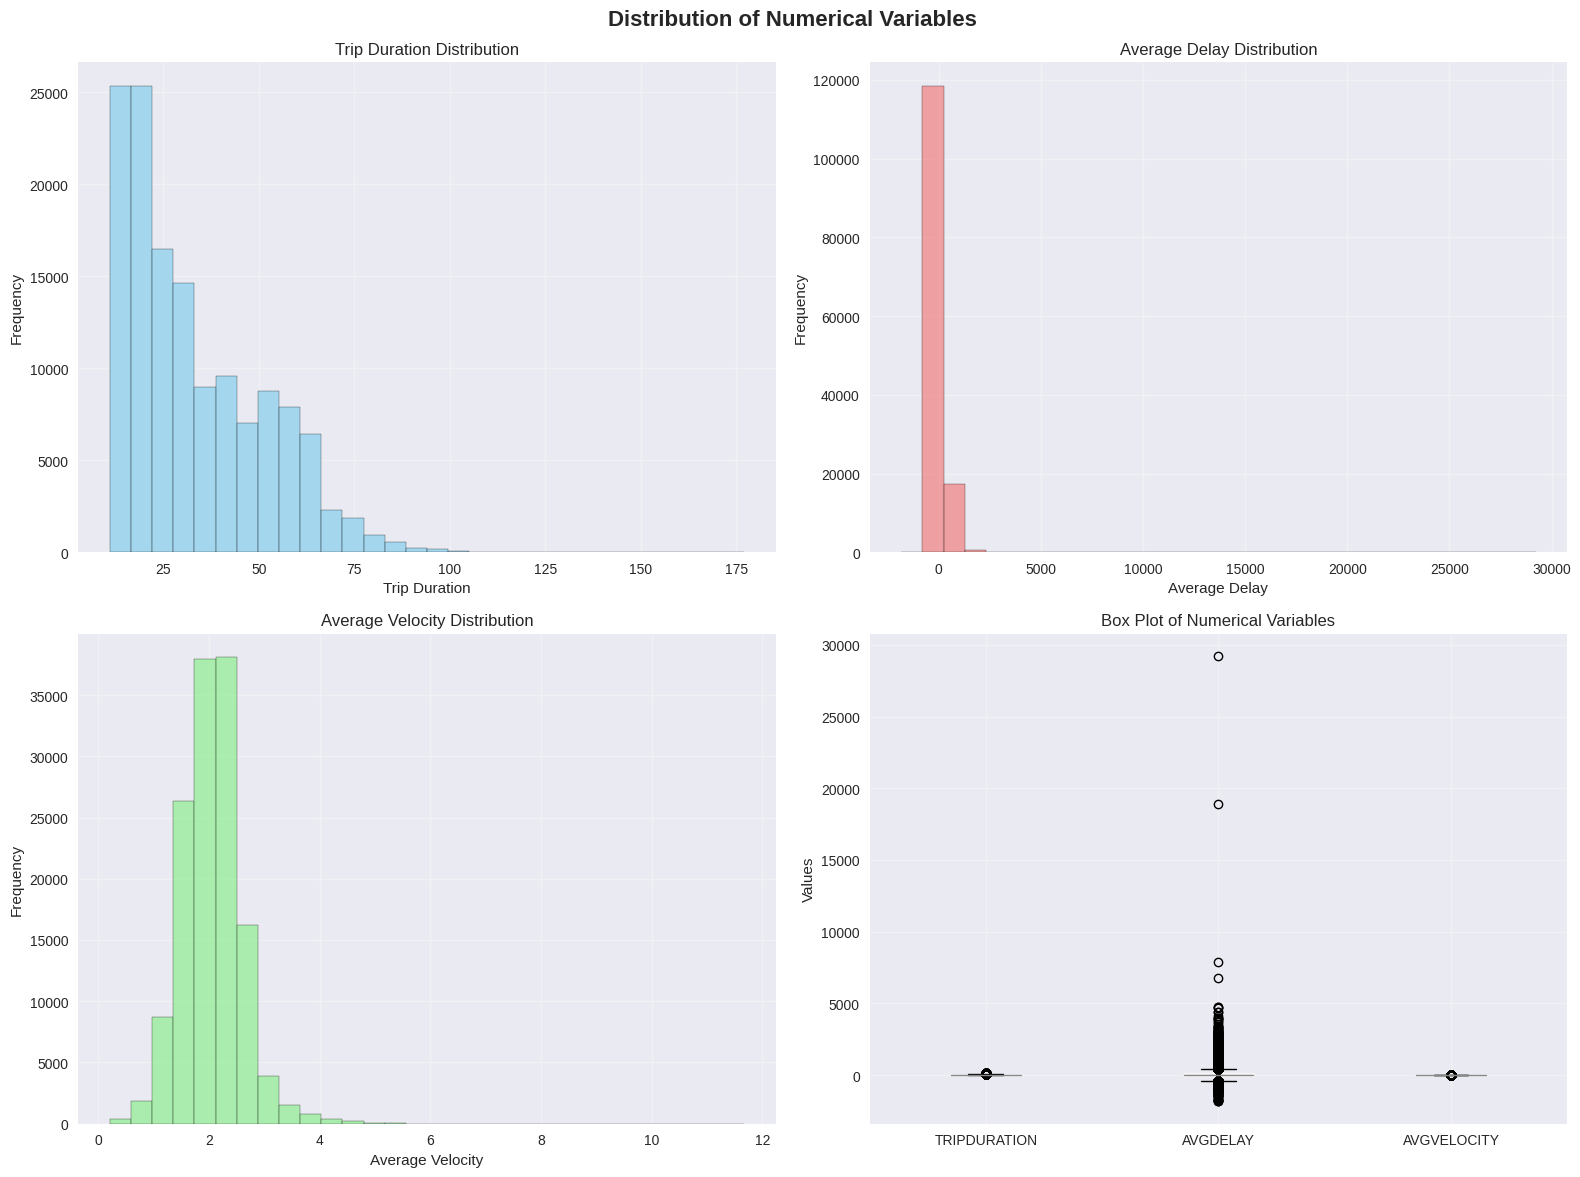

In [10]:
# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Create subplots for distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# TRIPDURATION distribution
axes[0, 0].hist(df['TRIPDURATION'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Trip Duration Distribution')
axes[0, 0].set_xlabel('Trip Duration')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# AVGDELAY distribution
axes[0, 1].hist(df['AVGDELAY'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Average Delay Distribution')
axes[0, 1].set_xlabel('Average Delay')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# AVGVELOCITY distribution
axes[1, 0].hist(df['AVGVELOCITY'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Average Velocity Distribution')
axes[1, 0].set_xlabel('Average Velocity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Box plot for all numerical variables
df[numerical_cols].boxplot(ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Numerical Variables')
axes[1, 1].set_ylabel('Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

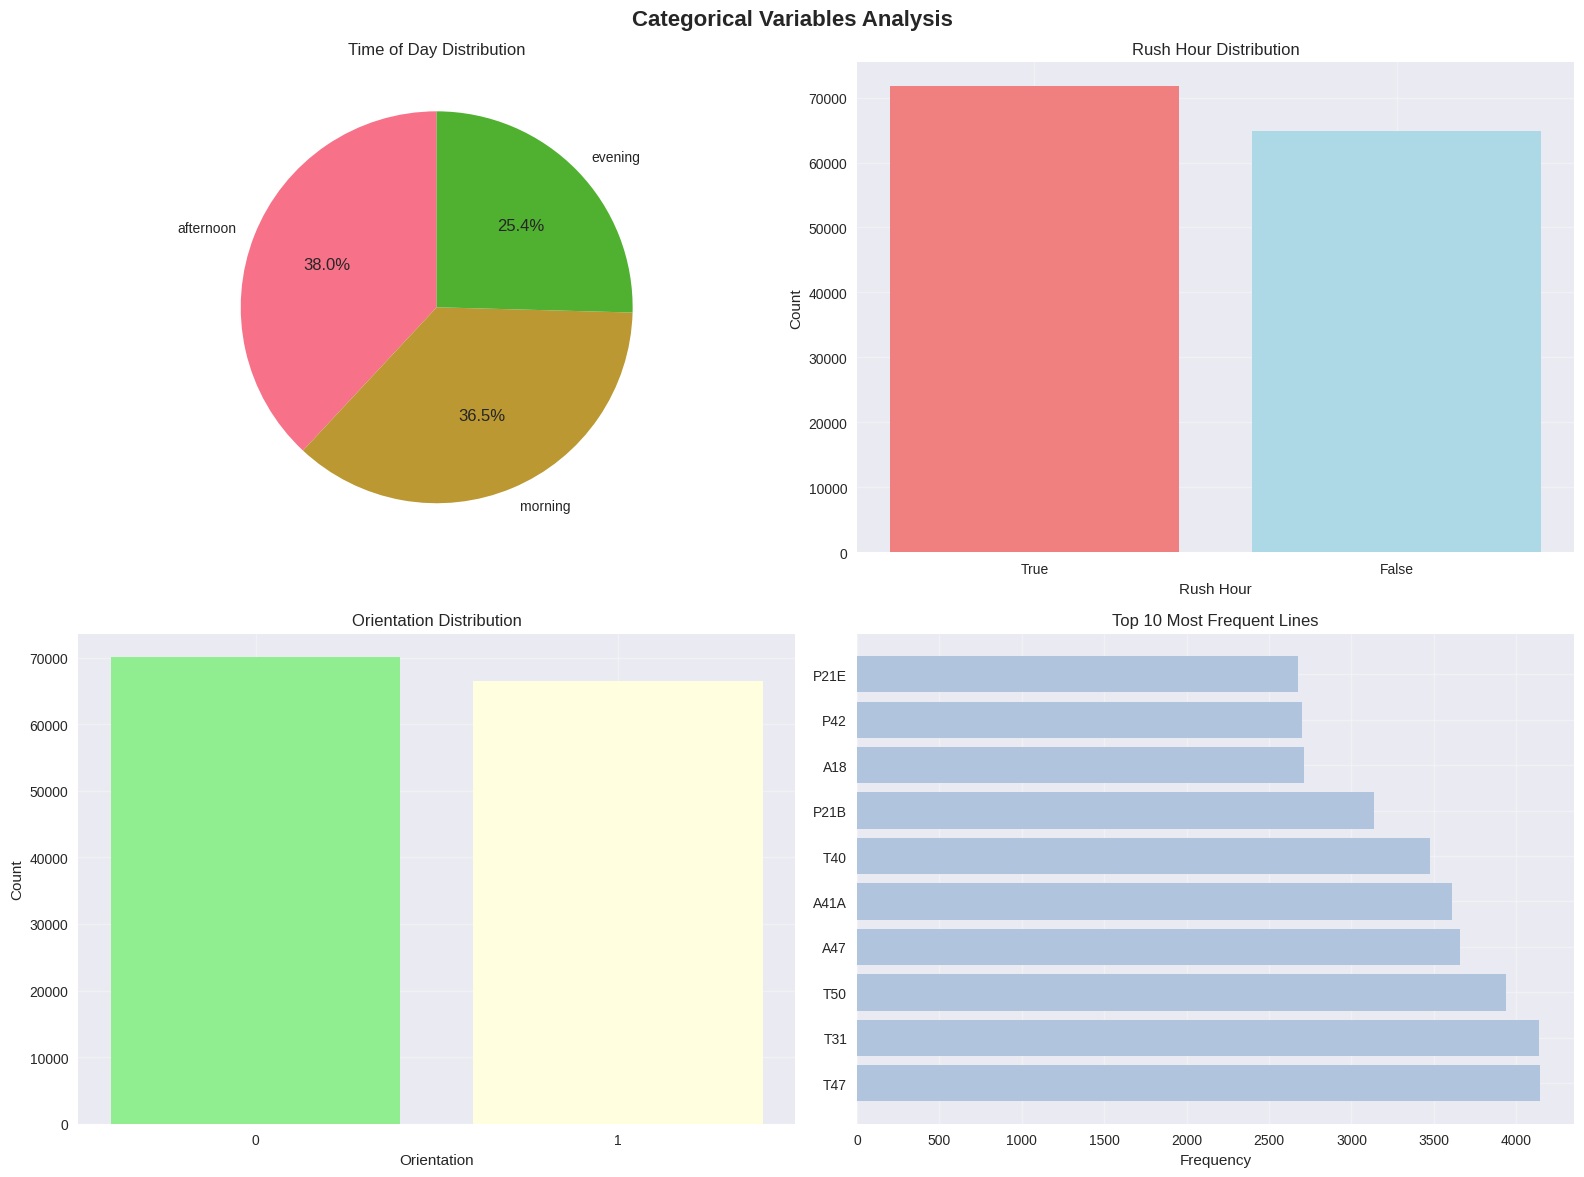

In [11]:
# Categorical variables analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Categorical Variables Analysis', fontsize=16, fontweight='bold')

# TIMEOFDAY distribution
time_counts = df['TIMEOFDAY'].value_counts()
axes[0, 0].pie(time_counts.values, labels=time_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Time of Day Distribution')

# RUSHHOUR distribution
rush_counts = df['RUSHHOUR'].value_counts()
axes[0, 1].bar(rush_counts.index.astype(str), rush_counts.values, color=['lightcoral', 'lightblue'])
axes[0, 1].set_title('Rush Hour Distribution')
axes[0, 1].set_xlabel('Rush Hour')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(True, alpha=0.3)

# ORIENTATION distribution
orient_counts = df['ORIENTATION'].value_counts()
axes[1, 0].bar(orient_counts.index.astype(str), orient_counts.values, color=['lightgreen', 'lightyellow'])
axes[1, 0].set_title('Orientation Distribution')
axes[1, 0].set_xlabel('Orientation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3)

# Top 10 LINE frequencies
line_counts = df['LINE'].value_counts().head(10)
axes[1, 1].barh(range(len(line_counts)), line_counts.values, color='lightsteelblue')
axes[1, 1].set_yticks(range(len(line_counts)))
axes[1, 1].set_yticklabels(line_counts.index)
axes[1, 1].set_title('Top 10 Most Frequent Lines')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

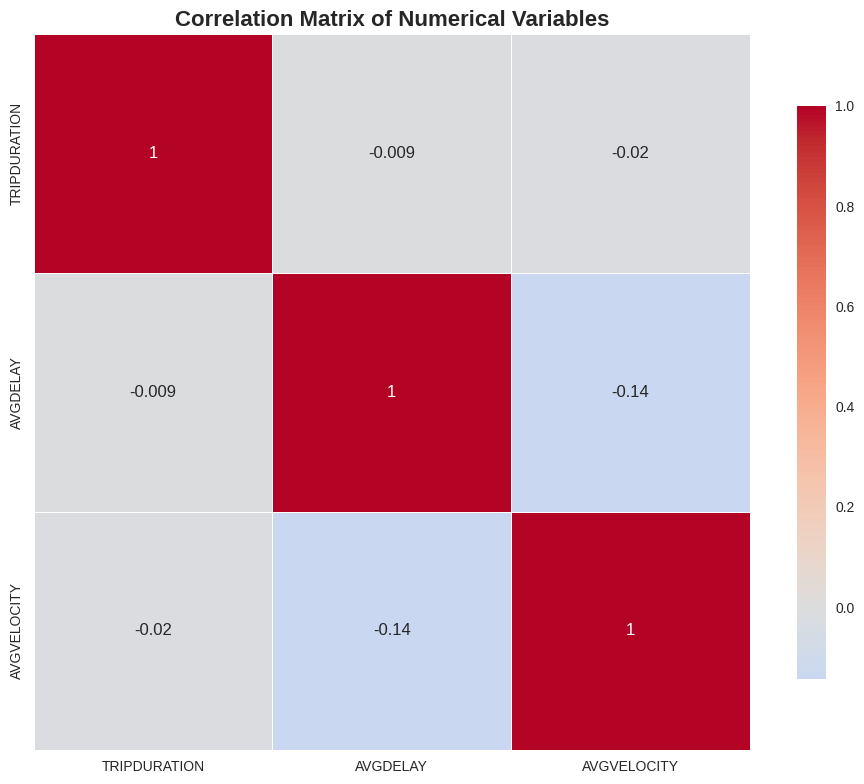

In [12]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

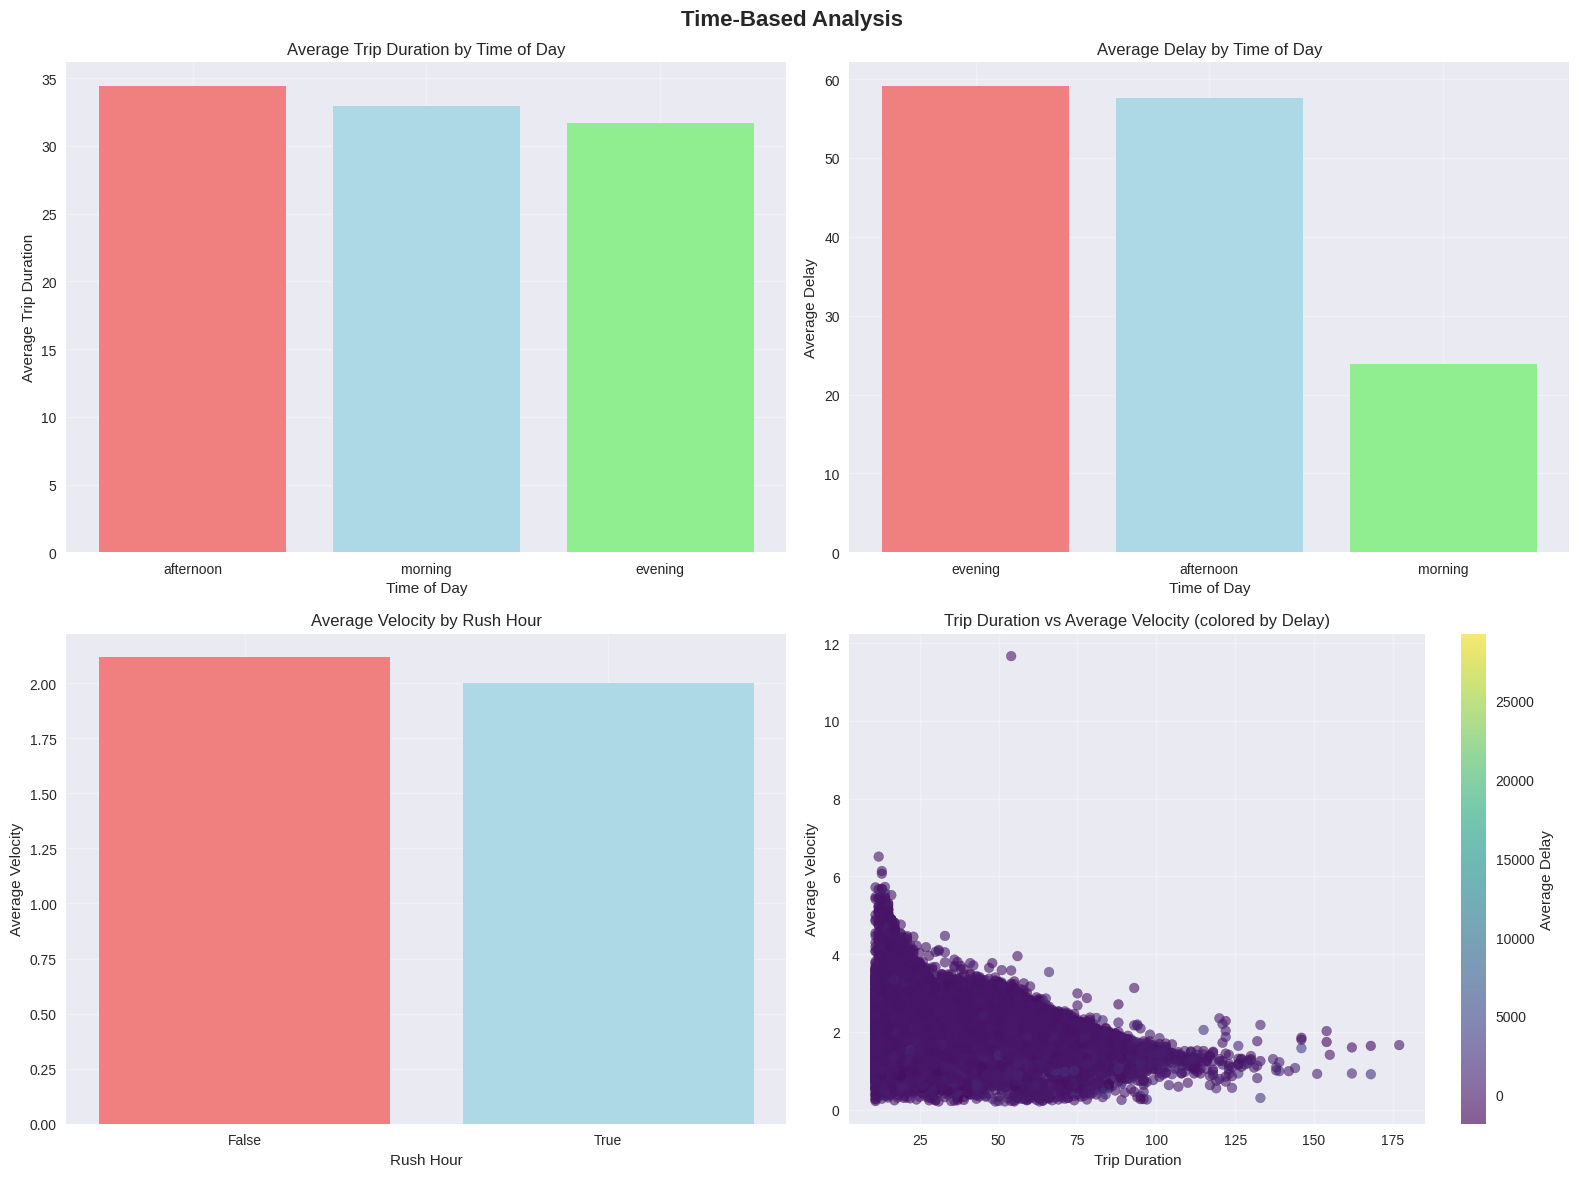

In [13]:
# Time-based analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time-Based Analysis', fontsize=16, fontweight='bold')

# Average trip duration by time of day
time_duration = df.groupby('TIMEOFDAY')['TRIPDURATION'].mean().sort_values(ascending=False)
axes[0, 0].bar(time_duration.index, time_duration.values, color=['lightcoral', 'lightblue', 'lightgreen'])
axes[0, 0].set_title('Average Trip Duration by Time of Day')
axes[0, 0].set_xlabel('Time of Day')
axes[0, 0].set_ylabel('Average Trip Duration')
axes[0, 0].grid(True, alpha=0.3)

# Average delay by time of day
time_delay = df.groupby('TIMEOFDAY')['AVGDELAY'].mean().sort_values(ascending=False)
axes[0, 1].bar(time_delay.index, time_delay.values, color=['lightcoral', 'lightblue', 'lightgreen'])
axes[0, 1].set_title('Average Delay by Time of Day')
axes[0, 1].set_xlabel('Time of Day')
axes[0, 1].set_ylabel('Average Delay')
axes[0, 1].grid(True, alpha=0.3)

# Average velocity by rush hour
rush_velocity = df.groupby('RUSHHOUR')['AVGVELOCITY'].mean()
axes[1, 0].bar(rush_velocity.index.astype(str), rush_velocity.values, color=['lightcoral', 'lightblue'])
axes[1, 0].set_title('Average Velocity by Rush Hour')
axes[1, 0].set_xlabel('Rush Hour')
axes[1, 0].set_ylabel('Average Velocity')
axes[1, 0].grid(True, alpha=0.3)

# Trip duration vs Average velocity scatter plot
scatter = axes[1, 1].scatter(df['TRIPDURATION'], df['AVGVELOCITY'], 
                              c=df['AVGDELAY'], cmap='viridis', alpha=0.6)
axes[1, 1].set_xlabel('Trip Duration')
axes[1, 1].set_ylabel('Average Velocity')
axes[1, 1].set_title('Trip Duration vs Average Velocity (colored by Delay)')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Average Delay')

plt.tight_layout()
plt.show()

## 6. Advanced Analysis

In [14]:
# Performance analysis by line
line_performance = df.groupby('LINE').agg({
    'TRIPDURATION': ['mean', 'std', 'count'],
    'AVGDELAY': ['mean', 'std'],
    'AVGVELOCITY': ['mean', 'std']
}).round(2)

line_performance.columns = ['_'.join(col).strip() for col in line_performance.columns]
line_performance = line_performance.sort_values('TRIPDURATION_mean', ascending=False)

print("Top 15 Lines by Average Trip Duration:")
print("=" * 50)
print(line_performance.head(15))

Top 15 Lines by Average Trip Duration:
      TRIPDURATION_mean  TRIPDURATION_std  TRIPDURATION_count  AVGDELAY_mean  \
LINE                                                                           
P21E              72.76             13.15                2677          21.69   
P21C              72.71             10.65                1176         -26.67   
P51C              65.16             11.05                1974          88.94   
P21A              64.76             10.55                 953          45.45   
P21B              60.60              8.22                3136          -1.68   
P47A              59.83              8.69                2204          52.29   
T51               59.54              7.85                2303          21.62   
T31               58.69              6.99                4135         -21.83   
P27D              57.78              9.98                1195          37.75   
P47B              55.02              8.36                1058          60.03   
P

In [15]:
# Efficiency analysis
df['EFFICIENCY'] = df['AVGVELOCITY'] / df['TRIPDURATION']

efficiency_by_time = df.groupby('TIMEOFDAY')['EFFICIENCY'].agg(['mean', 'std', 'count']).round(4)
efficiency_by_rush = df.groupby('RUSHHOUR')['EFFICIENCY'].agg(['mean', 'std', 'count']).round(4)

print("Efficiency Analysis:")
print("=" * 30)
print("\nBy Time of Day:")
print(efficiency_by_time)
print("\nBy Rush Hour:")
print(efficiency_by_rush)

Efficiency Analysis:

By Time of Day:
             mean     std  count
TIMEOFDAY                       
afternoon  0.0771  0.0468  51982
evening    0.0887  0.0532  34739
morning    0.0830  0.0491  49900

By Rush Hour:
            mean     std  count
RUSHHOUR                       
False     0.0870  0.0521  64789
True      0.0779  0.0467  71832


<Figure size 1200x800 with 0 Axes>

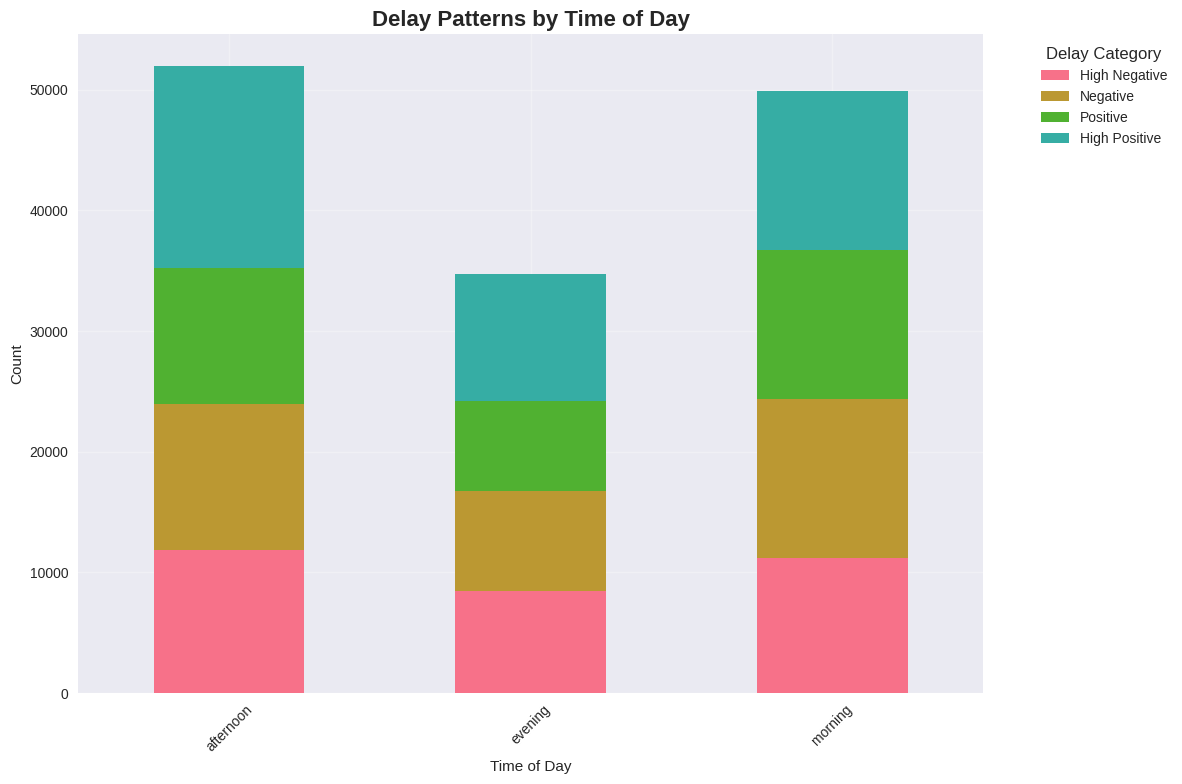

In [16]:
# Delay patterns analysis
df['DELAY_CATEGORY'] = pd.cut(df['AVGDELAY'], 
                              bins=[-float('inf'), -100, 0, 100, float('inf')],
                              labels=['High Negative', 'Negative', 'Positive', 'High Positive'])

delay_analysis = df.groupby(['TIMEOFDAY', 'DELAY_CATEGORY']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
delay_analysis.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Delay Patterns by Time of Day', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Delay Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Key Insights and Summary

In [17]:
# Summary statistics
print("KEY INSIGHTS AND SUMMARY")
print("=" * 50)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Time period: {df['DATE'].min()} to {df['DATE'].max()}")
print(f"   - Unique lines: {df['LINE'].nunique()}")

print(f"\n2. PERFORMANCE METRICS:")
print(f"   - Average trip duration: {df['TRIPDURATION'].mean():.2f} minutes")
print(f"   - Average delay: {df['AVGDELAY'].mean():.2f} seconds")
print(f"   - Average velocity: {df['AVGVELOCITY'].mean():.2f} units")

print(f"\n3. TIME PATTERNS:")
best_time = df.groupby('TIMEOFDAY')['EFFICIENCY'].mean().idxmax()
worst_time = df.groupby('TIMEOFDAY')['EFFICIENCY'].mean().idxmin()
print(f"   - Most efficient time: {best_time}")
print(f"   - Least efficient time: {worst_time}")

print(f"\n4. RUSH HOUR IMPACT:")
rush_efficiency = df[df['RUSHHOUR'] == True]['EFFICIENCY'].mean()
non_rush_efficiency = df[df['RUSHHOUR'] == False]['EFFICIENCY'].mean()
print(f"   - Rush hour efficiency: {rush_efficiency:.4f}")
print(f"   - Non-rush hour efficiency: {non_rush_efficiency:.4f}")
print(f"   - Efficiency difference: {abs(rush_efficiency - non_rush_efficiency):.4f}")

print(f"\n5. DATA QUALITY:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate records: {df.duplicated().sum()}")
print(f"   - Outliers detected: {sum([df[(df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) | (df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))][col].count() for col in numerical_cols])}")

KEY INSIGHTS AND SUMMARY

1. DATASET OVERVIEW:
   - Total records: 136,621
   - Time period: 2025-07-31 to 2025-08-26
   - Unique lines: 89

2. PERFORMANCE METRICS:
   - Average trip duration: 33.20 minutes
   - Average delay: 45.67 seconds
   - Average velocity: 2.06 units

3. TIME PATTERNS:
   - Most efficient time: evening
   - Least efficient time: afternoon

4. RUSH HOUR IMPACT:
   - Rush hour efficiency: 0.0779
   - Non-rush hour efficiency: 0.0870
   - Efficiency difference: 0.0091

5. DATA QUALITY:
   - Missing values: 0
   - Duplicate records: 10
   - Outliers detected: 11435
